**Note: The tools used in this notebook are outdated. Though they are still available for use, we recommend you reference the ppp_codebkg_000_datainterfacing notebook to see the updated tools.**

Here we explain the data model for the primary <a href="http://www.lns.cornell.edu/Research/CLEO/">CLEO</a> datasets used in many of these activities.

This activity focuses mostly on accessing the data, not explaining the physics, though some helpful links are provided in the discussion.

First we import some standard python libraries, as well as the helper code, <b><tt>cleo_tools</tt></b>.

In [1]:
import numpy as np

import matplotlib.pylab as plt
%matplotlib notebook
# Uncomment the following line if you want your plots to be displayed in a separate interactive window.
#%matplotlib qt 

import sys
sys.path.append("../tools/")

#from draw_objects3D import *
import cleo_tools as cleo

Next, we will open the file and pull out the collision data. This will return a Python <a href="https://docs.python.org/2/tutorial/datastructures.html">list</a> of all the collisions in that file.

In [2]:
infile = open('../data/small_CLEO_test_file.dat')
collisions = cleo.get_collisions(infile)

number_of_collisions = len(collisions)
print("# of electron-positron collisions: %d" % (number_of_collisions))

# of electron-positron collisions: 101


Let's take a look at the first collision by looking at the first entry in the list of collisions.

In [3]:
print(collisions[0])

[[[0.279085, 0.187624, -0.073364, 0.133505, -1, -1.671273, -11.683205, -75.040497, 0.0, 7, 0, 0.0, 0.183578], [1.019725, -0.178729, 0.947881, 0.299894, 1, -1.830502, -2.553785, -79.300964, -6.358639, 6, 0, 0.0, 0.320355], [0.436359, -0.370543, -0.148504, -0.107581, 1, 0.917965, -8.011919, -64.965729, 0.0, 6, 0, 0.0, 0.216381]], [[0.879382, 0.095546, -0.708242, -0.137368, -1, 2.729964, -0.664625, 0.0, -90.84848, 0, 9, 0.0, 0.567948]], [], [], [[0.253472, 0.046423, 0.228371, -0.099699], [0.239568, 0.116614, -0.178629, -0.109021], [0.220037, -0.020724, -0.123209, -0.181126], [0.096208, 0.088001, 0.037087, 0.011675], [0.052718, -0.002215, -0.028248, 0.044456], [0.040774, -0.009635, -0.019504, 0.034486], [0.041183, 0.000455, 0.028166, -0.030042], [0.040497, -0.009829, -0.011206, 0.037653], [0.033564, 0.010412, 0.028661, -0.014024], [0.028969, -0.003624, -0.014931, 0.024559], [0.030313, -0.002049, 0.015138, 0.026183], [0.025987, -0.005524, -0.025039, -0.004221], [0.025925, 0.006161, -0.02514

We see that this entry is a list of other lists! How many of these other lists are there?

In [4]:
print(len(collisions[0]))

5


What are these 5 entries? Each of them contains information about different particles and other physics quantities that you would want to analyze in any given proton-proton collision.

These entries contain information about (in order):
* <a href="http://en.wikipedia.org/wiki/Pion">pions</a>
* <a href="http://en.wikipedia.org/wiki/Kaon">kaons</a>
* <a href="http://en.wikipedia.org/wiki/Muon">muons</a>
* <a href="http://en.wikipedia.org/wiki/Electron">electrons</a>
* <a href="http://en.wikipedia.org/wiki/Photon">photons</a> 

Each of these 5 entries is a list containting, for example, the information about each pion in the event. A particular collision will most likely have a different number of pion than the previous collision, so you need to be aware of this when you write your code.

In [5]:
print("# of pions:      %d" % (len(collisions[0][0])))
print("# of kaons:      %d" % (len(collisions[0][1])))
print("# of muons:     %d" % (len(collisions[0][2])))
print("# of electrons: %d" % (len(collisions[0][3])))
print("# of photons:   %d" % (len(collisions[0][4])))

# of pions:      3
# of kaons:      1
# of muons:     0
# of electrons: 0
# of photons:   16


It's easiest to access these quantities by making use of Python's syntax in accessing multiple entries of a list in one line.

In [6]:
pions,kaons,muons,electrons,photons = collisions[0]

Let's look at the information for each of these quantities. The first 4 entries are all charged particles and contain the same type of information. 

## Pions, kaons, muons, electrons

In [7]:
E,px,py,pz,charge,sigpi,sigka,likpi,likka,nphopi,nphoka,depthmu,cluster_energy = pions[0]
print("E:       %8.4f" % (E))
print("px:      %8.4f" % (px))
print("py:      %8.4f" % (py))
print("pz:      %8.4f" % (pz))
print("charge:  %d" % (charge))
print("sigpi:    %8.4f" % (sigpi))
print("sigka:    %8.4f" % (sigka))
print("likpi:    %8.4f" % (likpi))
print("likka:    %8.4f" % (likka))
print("nphopi:   %8.4f" % (nphopi))
print("nphoka:   %8.4f" % (nphoka))
print("depthmu:  %8.4f" % (depthmu))
print("cluster_energy:    %8.4f" % (cluster_energy))


E:         0.2791
px:        0.1876
py:       -0.0734
pz:        0.1335
charge:  -1
sigpi:     -1.6713
sigka:    -11.6832
likpi:    -75.0405
likka:      0.0000
nphopi:     7.0000
nphoka:     0.0000
depthmu:    0.0000
cluster_energy:      0.1836


Those first 4 entries refer to the energy and Cartesian-components of the momentum of the jet. Collectively, this is referred to as the <a href="http://en.wikipedia.org/wiki/Four-momentum">four-momentum</a> (or four-vector) and it is the bread-and-butter of most of the analyses. 

The 5th entry is the electric charge.

The next entries are...

## Photons

In [8]:
E,px,py,pz = photons[0]
print("E:  %8.4f" % (E))
print("px: %8.4f" % (px))
print("py: %8.4f" % (py))
print("pz: %8.4f" % (pz))

E:    0.2535
px:   0.0464
py:   0.2284
pz:  -0.0997


Photons are electrically neutral, so the only 4 entries are the components of the four-momentum.

## Sample skeleton code

Here is a snippet of code that loops over some data and plots the number of pions, the energy of the pions, and the energy of the kaons for each event.

<IPython.core.display.Javascript object>


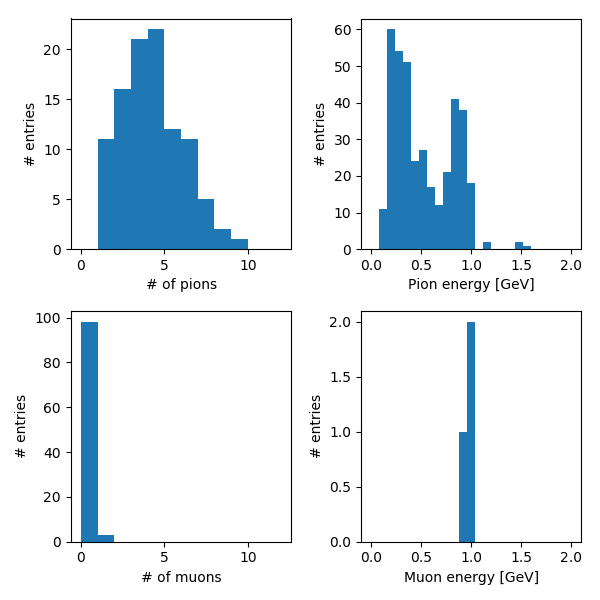

In [9]:
infile = open('../data/small_CLEO_test_file.dat')
collisions = cleo.get_collisions(infile)

# We will use these to store the quantities that we will be plotting later.
npions = []
nmuons = []
pions_E = []
muons_E = []

for collision in collisions:
    
    pions,kaons,muons,electrons,photons = collision
    
    npions.append(len(pions))
    nmuons.append(len(muons))
    
    for pion in pions:
        E,px,py,pz,q = pion[0:5]
        pions_E.append(E)
        
    for muon in muons:
        E,px,py,pz,q = muon[0:5]
        muons_E.append(E)
        
# Plot the quantities
plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.hist(npions,bins=12,range=(0,12))
plt.xlabel(r'# of pions')
plt.ylabel('# entries')

plt.subplot(2,2,2)
plt.hist(pions_E,bins=25,range=(0,2))
plt.xlabel(r'Pion energy [GeV]')
plt.ylabel('# entries')

plt.subplot(2,2,3)
plt.hist(nmuons,bins=12,range=(0,12))
plt.xlabel(r'# of muons')
plt.ylabel('# entries')

plt.subplot(2,2,4)
plt.hist(muons_E,bins=25,range=(0,2))
plt.xlabel(r'Muon energy [GeV]')
plt.ylabel('# entries')

plt.tight_layout()